In [2]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173913 sha256=c9fcccac87fa78a365aea42a4b36e2fa56f8cd0753a9f4212da7b1150baafa01
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

# Define a Moving Average Crossover strategy
class SmaCross(Strategy):
    n1 = 10  # Short-term moving average period
    n2 = 50  # Long-term moving average period

    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)

    def next(self):
        # If the short-term MA crosses above the long-term MA, buy
        if crossover(self.sma1, self.sma2):
            self.buy()
        # If the short-term MA crosses below the long-term MA, sell
        elif crossover(self.sma2, self.sma1):
            self.sell()


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
/usr/local/lib/python3.10/dist-packages/backtesting/test/__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-cons

In [5]:
# Convert your DataFrame to the format required by Backtest
bt = Backtest(df, SmaCross, cash=10_000, commission=.002)

# Run the backtest
stats = bt.run()

# Print the backtest results
print(stats)

# Optionally, plot the results
bt.plot()

Start                                     0.0
End                                       6.0
Duration                                  6.0
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]                     7.0
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                  0.0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

<ipython-input-5-9e8af87ee9e2>:2: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(df, SmaCross, cash=10_000, commission=.002)
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1178', ...)

## Getting into Backtesting.py for backtesting trading strategies

In [6]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6b2cc36a954a3ba6d9074f8cf8995bc0a61a8708c5541d369d3313cf563ec93e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [7]:
from backtesting import Backtest, Strategy
from backtesting.test import GOOG

In [8]:
import ta
GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [9]:
from backtesting.lib import crossover

In [10]:
rsi_indicator = ta.momentum.rsi(close=GOOG.Close, window=14)
rsi_indicator

,rsi
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2013-02-25,61.477295
2013-02-26,61.050100
2013-02-27,64.999388
2013-02-28,65.552880


In [31]:
GOOG.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
GOOG.describe()

,Open,High,Low,Close,Volume
count,2148.000000,2148.000000,2148.000000,2148.000000,2.148000e+03
mean,475.711318,480.848254,470.138641,475.478212,5.519735e+06
std,145.856971,146.418058,145.056323,145.772446,4.458604e+06
min,99.190000,101.740000,95.960000,100.010000,8.409000e+05
25%,387.237500,391.850000,381.500000,387.090000,2.612150e+06
50%,490.510000,496.320000,483.900000,489.790000,4.105050e+06
75%,584.252500,588.432500,578.000000,582.645000,6.872350e+06
max,805.300000,808.970000,801.030000,806.850000,4.111670e+07


In [12]:
class RsiOscillator(Strategy):
  upper_bound = 70
  lower_bound = 30

  def init(self):
    # Calculate the RSI indicator inside the def init
    # The Close values must be passed as pd.series value for confirmation and positional arguments are followed in the ta indicator
    close_prices = pd.Series(self.data.Close)
    self.rsi = self.I(ta.momentum.rsi, close_prices, window=14)
    # self.rsi = self.I(rsi_indicator.rsi)

  def next(self):
    if crossover(self.rsi, self.upper_bound):
      self.position.close()

    elif crossover(self.lower_bound, self.rsi):
      self.buy()

bt = Backtest(GOOG, RsiOscillator, cash=10_000)
stats = bt.run()
stats

,0
Start,2004-08-19 00:00:00
End,2013-03-01 00:00:00
Duration,3116 days 00:00:00
Exposure Time [%],29.329609
Equity Final [$],15677.5
Equity Peak [$],15835.7
Return [%],56.775
Buy & Hold Return [%],703.458242
Return (Ann.) [%],5.416737
Volatility (Ann.) [%],23.502544


In [13]:
class RsiOscillator(Strategy):
    upper_bound = 70  # Overbought RSI level
    lower_bound = 30  # Oversold RSI level
    rsi_window = 14  # RSI window size

    def init(self):
        # Convert the Close price data to a pandas Series for compatibility with ta
        close_prices = pd.Series(self.data.Close)

        # Calculate the RSI using ta.momentum.rsi()
        self.rsi = self.I(ta.momentum.rsi, close_prices, self.rsi_window)

    def next(self):
        # If RSI crosses above the upper bound, close any open positions (sell)
        if self.rsi[-1] > self.upper_bound:
            self.position.close()

        # If RSI crosses below the lower bound, open a new position (buy)
        elif self.rsi[-1] < self.lower_bound:
            self.buy()

# Run the backtest using the sample GOOG data from backtesting.py
bt = Backtest(GOOG, RsiOscillator, cash=10_000)
stats = bt.optimize(upper_bound = range(50,85,5),
                    lower_bound = range(20,40,5),
                    rsi_window = range(10,30,2),
                    maximize = 'Sharpe Ratio')

# Display the backtest results
print(stats)


Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   62.662942
Equity Final [$]                     45486.35
Equity Peak [$]                      45573.15
Return [%]                           354.8635
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.448742
Volatility (Ann.) [%]               32.629176
Sharpe Ratio                         0.596054
Sortino Ratio                        1.122836
Calmar Ratio                          0.35036
Max. Drawdown [%]                  -55.510789
Avg. Drawdown [%]                   -4.037504
Max. Drawdown Duration      548 days 00:00:00
Avg. Drawdown Duration       34 days 00:00:00
# Trades                                   17
Win Rate [%]                        76.470588
Best Trade [%]                      41.689994
Worst Trade [%]                    -27.637707
Avg. Trade [%]                    

In [14]:
bt.plot(open_browser=True)

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p1553', ...)

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   62.662942
Equity Final [$]                     45486.35
Equity Peak [$]                      45573.15
Return [%]                           354.8635
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   19.448742
Volatility (Ann.) [%]               32.629176
Sharpe Ratio                         0.596054
Sortino Ratio                        1.122836
Calmar Ratio                          0.35036
Max. Drawdown [%]                  -55.510789
Avg. Drawdown [%]                   -4.037504
Max. Drawdown Duration      548 days 00:00:00
Avg. Drawdown Duration       34 days 00:00:00
# Trades                                   17
Win Rate [%]                        76.470588
Best Trade [%]                      41.689994
Worst Trade [%]                    -27.637707
Avg. Trade [%]                    

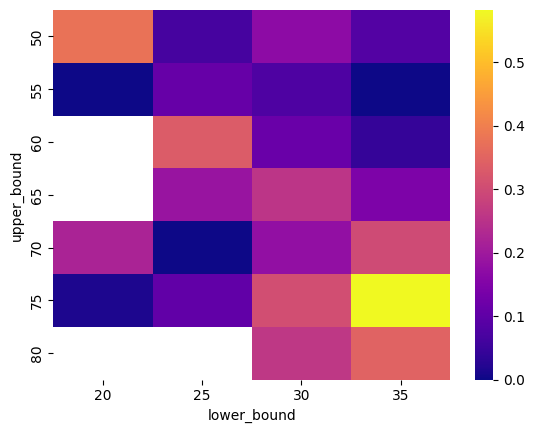

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p4649', ...)

In [26]:
# we can define our own optimization function to check & optimize two different  factors
def optim_func(series):
  # we first filter everything that has less than 10 trades
  if series['# Trades'] < 10:
    return -1
  return series['Equity Final [$]'] / series['Exposure Time [%]']

class RsiOscillator(Strategy):
    upper_bound = 70  # Overbought RSI level
    lower_bound = 30  # Oversold RSI level
    rsi_window = 14  # RSI window size

    def init(self):
        # Convert the Close price data to a pandas Series for compatibility with ta
        close_prices = pd.Series(self.data.Close)

        # Calculate the RSI using ta.momentum.rsi()
        self.rsi = self.I(ta.momentum.rsi, close_prices, self.rsi_window)

    def next(self):
        # If RSI crosses above the upper bound, close any open positions (sell)
        if self.rsi[-1] > self.upper_bound:
            self.position.close()

        # If RSI crosses below the lower bound, open a new position (buy)
        elif self.rsi[-1] < self.lower_bound:
            self.buy()

# Run the backtest using the sample GOOG data from backtesting.py
bt = Backtest(GOOG, RsiOscillator, cash=10_000)

# stats = bt.run()

stats, heatmap = bt.optimize(upper_bound = range(50,85,5),
                    lower_bound = range(20,40,5),
                    rsi_window = range(10,30,2) ,
                    maximize = 'Sharpe Ratio',
                    constraint = lambda param: param.upper_bound > param.lower_bound,
                    max_tries = 100,
                    return_heatmap = True)

# Display the backtest results
print(stats)
print(heatmap)

hm = heatmap.groupby(['upper_bound', 'lower_bound']).mean().unstack()
sns.heatmap(hm, cmap = 'plasma')
plt.show()
# hm.plot()
bt.plot()


## Strategy Optimization
* Multi-timeframe strategy

In [27]:
from backtesting.lib import resample_apply
import seaborn as sns

In [30]:
class RsiOscillator(Strategy):
    upper_bound = 70  # Overbought RSI level
    lower_bound = 30  # Oversold RSI level
    rsi_window = 14  # RSI window size

    def init(self):
        close_prices = pd.Series(self.data.Close)
        self.daily_rsi = self.I(ta.momentum.rsi, close_prices, self.rsi_window)

        self.weekly_rsi =resample_apply('W-FRI', ta.momentum.rsi, self.data.Close, self.rsi_window)

    def next(self):
      if (crossover(self.daily_rsi, self.upper_bound) and self.weekly_rsi[-1] > self.upper_bound):
        self.position.close()

      elif (crossover(self.lower_bound, self.daily_rsi) and self.weekly_rsi[-1] < self.lower_bound):
        self.buy()


bt = Backtest(GOOG, RsiOscillator, cash=10_000)

stats = bt.run()
print(stats)
bt.plot()


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   18.063315
Equity Final [$]                     11622.65
Equity Peak [$]                      13816.16
Return [%]                            16.2265
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    1.779778
Volatility (Ann.) [%]               20.395057
Sharpe Ratio                         0.087265
Sortino Ratio                        0.138485
Calmar Ratio                         0.031681
Max. Drawdown [%]                  -56.177549
Avg. Drawdown [%]                   -9.432909
Max. Drawdown Duration     1761 days 00:00:00
Avg. Drawdown Duration      226 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      16.445988
Worst Trade [%]                     16.445988
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p5469', ...)

How do we implement a reversal strategy and input features like `Take Profit` and `Stop Loss`

In [41]:
class RsiOscillator(Strategy):
    upper_bound = 70  # Overbought RSI level
    lower_bound = 30  # Oversold RSI level
    rsi_window = 14  # RSI window size

    def init(self):
        close_prices = pd.Series(self.data.Close)
        self.daily_rsi = self.I(ta.momentum.rsi, close_prices, self.rsi_window)

    def next(self):
      price = self.data.Close[-1]
      if (crossover(self.daily_rsi, self.upper_bound)):
        # if self.position.is_long:
        self.position.close()
          # self.buy()

      elif(self.lower_bound, self.daily_rsi):
        self.buy(size =1)
        # if self.position.is_short or not self.position:
        #   self.position.close()
        # self.buy(sl = 0.97*price, tp = 1.2*price)


# bt = Backtest(GOOG, RsiOscillator, cash=10_000

bt = Backtest(GOOG, RsiOscillator, cash=10_000)

stats = bt.run()
print(stats)
bt.plot()

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.301676
Equity Final [$]                      33123.5
Equity Peak [$]                      33367.88
Return [%]                            231.235
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   15.085754
Volatility (Ann.) [%]               30.092428
Sharpe Ratio                         0.501314
Sortino Ratio                        0.904028
Calmar Ratio                         0.234182
Max. Drawdown [%]                  -64.418982
Avg. Drawdown [%]                   -2.095315
Max. Drawdown Duration     1691 days 00:00:00
Avg. Drawdown Duration       32 days 00:00:00
# Trades                                 1300
Win Rate [%]                        83.615385
Best Trade [%]                      42.917016
Worst Trade [%]                    -38.002204
Avg. Trade [%]                    

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


GridPlot(id='p8566', ...)

In [42]:
stats

,0
Start,2004-08-19 00:00:00
End,2013-03-01 00:00:00
Duration,3116 days 00:00:00
Exposure Time [%],99.301676
Equity Final [$],33123.5
Equity Peak [$],33367.88
Return [%],231.235
Buy & Hold Return [%],703.458242
Return (Ann.) [%],15.085754
Volatility (Ann.) [%],30.092428


In [44]:
stats['_trades'].to_string()

'      Size  EntryBar  ExitBar  EntryPrice  ExitPrice     PnL  ReturnPct  EntryTime   ExitTime Duration\n0        1        17       18      107.45     110.56    3.11   0.028944 2004-09-14 2004-09-15   1 days\n1        1        16       18      106.63     110.56    3.93   0.036856 2004-09-13 2004-09-15   2 days\n2        1        15       18      101.60     110.56    8.96   0.088189 2004-09-10 2004-09-15   5 days\n3        1        27       28      121.30     126.70    5.40   0.044518 2004-09-28 2004-09-29   1 days\n4        1        26       28      119.56     126.70    7.14   0.059719 2004-09-27 2004-09-29   2 days\n5        1        25       28      120.94     126.70    5.76   0.047627 2004-09-24 2004-09-29   5 days\n6        1        24       28      118.84     126.70    7.86   0.066139 2004-09-23 2004-09-29   6 days\n7        1        23       28      117.40     126.70    9.30   0.079216 2004-09-22 2004-09-29   7 days\n8        1        22       28      119.81     126.70    6.89   

### Barssince `barssince`